In [4]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer


breast_cancer_ds = load_breast_cancer()

breast_cancer = pd.DataFrame(breast_cancer_ds.data, columns = breast_cancer_ds.feature_names)

breast_cancer['status'] = breast_cancer_ds.target

print(breast_cancer.head())
print(breast_cancer.shape)

print(breast_cancer["status"].value_counts())

   mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension  ...  worst texture  worst perimeter  worst area  \
0             

1 - Benign == 357
0 - Malignant == 212

In [5]:
correlations = breast_cancer.corr()
#To get the correlations of the features with the target only.
res = correlations["status"].abs().sort_values()
distribution = res.quantile([20/31])
#The top 10 correlations should be in the top 11 correlations, with the highest being 1, the target with itself.
cut_off10 = distribution[20/31]

top10_map = res[res >= cut_off10]

top10_cancer = breast_cancer[top10_map.keys()]
print(top10_cancer.head())
print(top10_cancer.shape)

   worst concavity  mean concavity  mean area  mean radius  worst area  \
0           0.7119          0.3001     1001.0        17.99      2019.0   
1           0.2416          0.0869     1326.0        20.57      1956.0   
2           0.4504          0.1974     1203.0        19.69      1709.0   
3           0.6869          0.2414      386.1        11.42       567.7   
4           0.4000          0.1980     1297.0        20.29      1575.0   

   mean perimeter  worst radius  mean concave points  worst perimeter  \
0          122.80         25.38              0.14710           184.60   
1          132.90         24.99              0.07017           158.80   
2          130.00         23.57              0.12790           152.50   
3           77.58         14.91              0.10520            98.87   
4          135.10         22.54              0.10430           152.20   

   worst concave points  status  
0                0.2654       0  
1                0.1860       0  
2             

   mean perimeter  worst radius  mean concave points  worst perimeter  \
0          122.80         25.38              0.14710           184.60   
1          132.90         24.99              0.07017           158.80   
2          130.00         23.57              0.12790           152.50   
3           77.58         14.91              0.10520            98.87   
4          135.10         22.54              0.10430           152.20   

   worst concave points  status  
0                0.2654       0  
1                0.1860       0  
2                0.2430       0  
3                0.2575       0  
4                0.1625       0  
(569, 6)


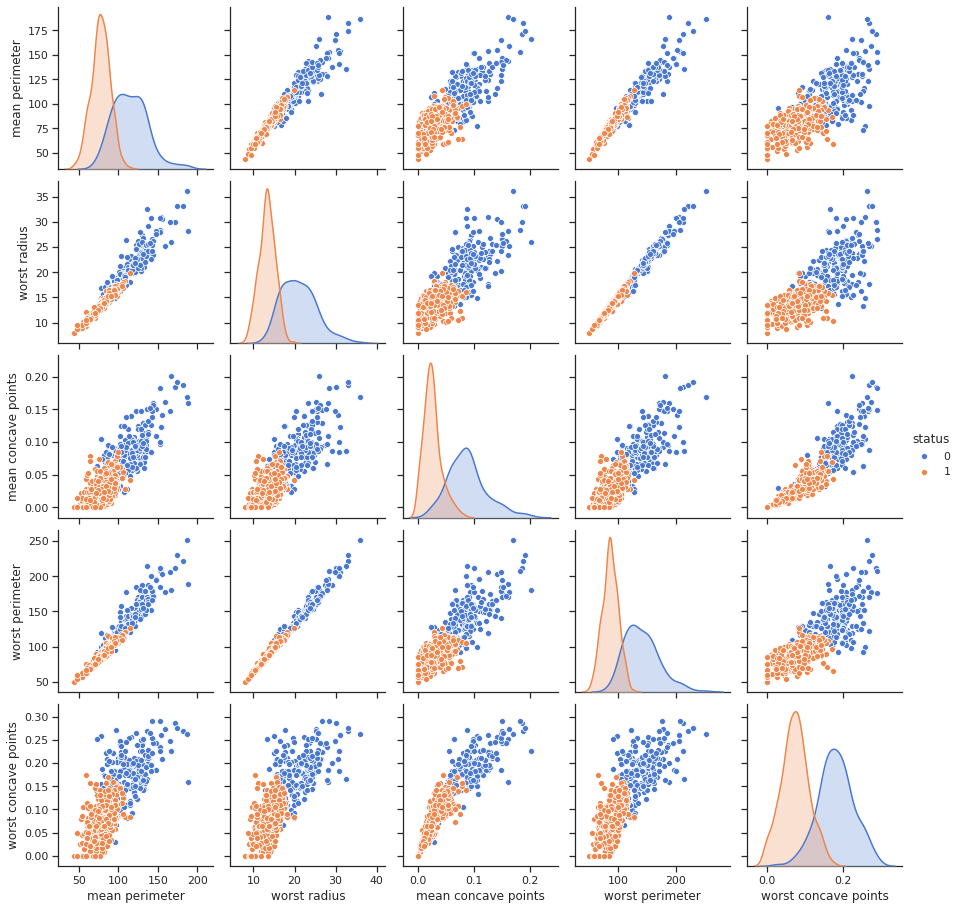

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

distribution2 = res.quantile([25/31])
cut_off5 = distribution2[25/31]

top5_map = res[res >= cut_off5]

top5_cancer = breast_cancer[top5_map.keys()]
print(top5_cancer.head())
print(top5_cancer.shape)

sns.set(style = "ticks", palette = "muted")
sns.pairplot(top5_cancer, hue = "status")
plt.show()

status
0 - WDBC-Malignant
1 - WDBC-Benign

In [7]:
top5_cancer_copy = top5_cancer.copy()
for col in top5_cancer_copy.columns:
    if col != "status":
        temp = top5_cancer_copy[col].mean()
        temp2 = top5_cancer_copy[col].values
        mask = (temp2 < temp) 
        temp2[mask] = "NaN"
        temp2 = pd.Series(temp2)
        top5_cancer_copy.loc[ : , col] = temp2

print(top5_cancer_copy.head())

   mean perimeter  worst radius  mean concave points  worst perimeter  \
0           122.8         25.38              0.14710            184.6   
1           132.9         24.99              0.07017            158.8   
2           130.0         23.57              0.12790            152.5   
3             NaN           NaN              0.10520              NaN   
4           135.1         22.54              0.10430            152.2   

   worst concave points  status  
0                0.2654       0  
1                0.1860       0  
2                0.2430       0  
3                0.2575       0  
4                0.1625       0  
